In [1]:
%matplotlib inline 

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
import cv2.aruco as aruco
from glob import glob
import pickle

In [94]:
class Calibrate(object):
    def __init__(self):
        self.dictionary = aruco.Dictionary_get(aruco.DICT_4X4_50)
        parameters = aruco.DetectorParameters_create()
        x = 5  # horizontal
        y = 7  # vertical
        sqr = 0.254  # solid black squares
        mrk = 0.23 # markers, must be smaller than squares
        self.board = aruco.CharucoBoard_create(
            x,y,
            sqr,
            mrk,
            self.dictionary)
        
    def calibrate(self, imgs):
        calcorners = []
        calids = []

        for im in imgs:
            if len(im.shape) > 2:
                gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
            else:
                gray = im.copy()
                
            corners, ids, rejectedImgPts = aruco.detectMarkers(gray, self.dictionary)
            print("detectMarkers found {} corners {} ids".format(
                len(corners), len(ids)))
            
            # if ids were found, then
            if ids is not None and len(ids) > 0:
                ret, chcorners, chids = aruco.interpolateCornersCharuco(
                    corners, ids, gray, self.board)
                print("interpolateCornersCharuco[{}] found {} corners {} ids".format(
                    ret, len(chcorners), len(chids)))
                calcorners.append(chcorners)
                calids.append(chids)

                if len(im.shape) > 2:
                    im2 = im.copy()
                else:
                    im2 = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)
                    
                aruco.drawDetectedCornersCharuco(im2, chcorners, chids)
                aruco.drawDetectedMarkers(im2, corners, ids=ids, borderColor=(100, 0, 240))

#                 plt.figure(figsize=(10,5))
#                 plt.imshow(im2)

        rms, cameraMatrix, distCoeffs, rvecs, tvecs = aruco.calibrateCameraCharuco(
            calcorners, calids, self.board, gray.shape[::-1], None, None)
        
        cam_params = {
            'marker_type': 'aruco',
            'cameraMatrix': cameraMatrix,
            'distCoeffs': distCoeffs,
            'image_size': imgs[0].shape[:2],
#             'marker_size': (x,y),
#             'marker_scale:': sqr
            'rms': rms
        }
        
        return (rms, cameraMatrix, distCoeffs, rvecs, tvecs, self.board.chessboardCorners, calcorners)

        
def get_images(path, gray=False):
    """
    Given a path, it reads all images. This uses glob to 
    grab file names and excepts wild cards *
    Ex. cal.getImages('./images/*.jpg')
    """
    imgsL = []
    imgsR = []
    files = glob(path)
    files.sort()

    print("Found {} images at {}".format(len(tuple(files)), path))
    # print('-'*40)

    for i, f in enumerate(files):
        img = cv2.imread(f)
        if img is None:
            print('>> Could not read: {}'.format(f))
        else:
            h, w = img.shape[:2]

            if gray:
                if len(img.shape) > 2:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            imgsL.append(img[:,:w//2])
            imgsR.append(img[:,w//2:])
    # print('-'*40)
    return imgsL, imgsR

In [95]:
cal = Calibrate()
rms1, M1, d1, r1, t1, objpoints, imgpoints_l = cal.calibrate(imgsL)

detectMarkers found 17 corners 17 ids
interpolateCornersCharuco[24] found 24 corners 24 ids
detectMarkers found 17 corners 17 ids
interpolateCornersCharuco[24] found 24 corners 24 ids
detectMarkers found 17 corners 17 ids
interpolateCornersCharuco[24] found 24 corners 24 ids
detectMarkers found 17 corners 17 ids
interpolateCornersCharuco[24] found 24 corners 24 ids
detectMarkers found 17 corners 17 ids
interpolateCornersCharuco[24] found 24 corners 24 ids
detectMarkers found 17 corners 17 ids
interpolateCornersCharuco[24] found 24 corners 24 ids
detectMarkers found 11 corners 11 ids
interpolateCornersCharuco[14] found 14 corners 14 ids
detectMarkers found 17 corners 17 ids
interpolateCornersCharuco[24] found 24 corners 24 ids
detectMarkers found 17 corners 17 ids
interpolateCornersCharuco[24] found 24 corners 24 ids
detectMarkers found 13 corners 13 ids
interpolateCornersCharuco[16] found 16 corners 16 ids
detectMarkers found 10 corners 10 ids
interpolateCornersCharuco[12] found 12 cor

Found 19 images at aruco-imgs/*.png


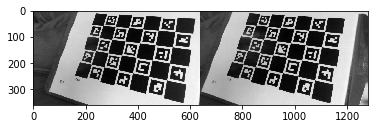

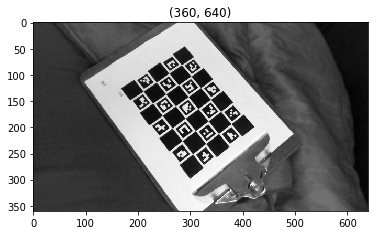

In [96]:
imgsL, imgsR = get_images("aruco-imgs/*.png", gray=True)
plt.figure()
plt.imshow(np.hstack((imgsL[0],imgsR[0])), cmap='gray');

plt.figure()
plt.imshow(imgsL[-1], cmap='gray')
plt.title('{}'.format(imgsL[0].shape));

In [97]:
help(aruco.drawDetectedMarkers)

Help on built-in function drawDetectedMarkers:

drawDetectedMarkers(...)
    drawDetectedMarkers(image, corners[, ids[, borderColor]]) -> image
    .   * @brief Draw detected markers in image
    .   *
    .   * @param image input/output image. It must have 1 or 3 channels. The number of channels is not
    .   * altered.
    .   * @param corners positions of marker corners on input image.
    .   * (e.g std::vector<std::vector<cv::Point2f> > ). For N detected markers, the dimensions of
    .   * this array should be Nx4. The order of the corners should be clockwise.
    .   * @param ids vector of identifiers for markers in markersCorners .
    .   * Optional, if not provided, ids are not painted.
    .   * @param borderColor color of marker borders. Rest of colors (text color and first corner color)
    .   * are calculated based on this one to improve visualization.
    .   *
    .   * Given an array of detected marker corners and its corresponding ids, this functions draws
    .   *

In [98]:
cal = Calibrate()
rms2, M2, d2, r2, t2, objpoints, imgpoints_r = cal.calibrate(imgsR)

detectMarkers found 17 corners 17 ids
interpolateCornersCharuco[24] found 24 corners 24 ids
detectMarkers found 17 corners 17 ids
interpolateCornersCharuco[24] found 24 corners 24 ids
detectMarkers found 17 corners 17 ids
interpolateCornersCharuco[24] found 24 corners 24 ids
detectMarkers found 17 corners 17 ids
interpolateCornersCharuco[24] found 24 corners 24 ids
detectMarkers found 17 corners 17 ids
interpolateCornersCharuco[24] found 24 corners 24 ids
detectMarkers found 17 corners 17 ids
interpolateCornersCharuco[24] found 24 corners 24 ids
detectMarkers found 12 corners 12 ids
interpolateCornersCharuco[16] found 16 corners 16 ids
detectMarkers found 17 corners 17 ids
interpolateCornersCharuco[24] found 24 corners 24 ids
detectMarkers found 17 corners 17 ids
interpolateCornersCharuco[24] found 24 corners 24 ids
detectMarkers found 10 corners 10 ids
interpolateCornersCharuco[12] found 12 corners 12 ids
detectMarkers found 10 corners 10 ids
interpolateCornersCharuco[11] found 11 cor

In [99]:
dir(cal.board)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'chessboardCorners',
 'create',
 'dictionary',
 'draw',
 'getChessboardSize',
 'getMarkerLength',
 'getSquareLength',
 'ids',
 'nearestMarkerCorners',
 'nearestMarkerIdx',
 'objPoints']

In [93]:
len(cal.board.chessboardCorners)

24

In [100]:
print('obj pts', len(objpoints))
print('imgpoints left', len(imgpoints_l))
print('imgpoints right', len(imgpoints_r))

flags = 0
flags |= cv2.CALIB_FIX_INTRINSIC
# flags |= cv2.CALIB_FIX_PRINCIPAL_POINT
flags |= cv2.CALIB_USE_INTRINSIC_GUESS
flags |= cv2.CALIB_FIX_FOCAL_LENGTH
# flags |= cv2.CALIB_FIX_ASPECT_RATIO
flags |= cv2.CALIB_ZERO_TANGENT_DIST
# flags |= cv2.CALIB_RATIONAL_MODEL
# flags |= cv2.CALIB_SAME_FOCAL_LENGTH
# flags |= cv2.CALIB_FIX_K3
# flags |= cv2.CALIB_FIX_K4
# flags |= cv2.CALIB_FIX_K5

stereocalib_criteria = (cv2.TERM_CRITERIA_MAX_ITER +
                        cv2.TERM_CRITERIA_EPS, 100, 1e-5)

ret, M1, d1, M2, d2, R, T, E, F = cv2.stereoCalibrate(
    objpoints,
    imgpoints_l,
    imgpoints_r,
    M1, d1,
    M2, d2,
    imgsL[0].shape[:2],
    criteria=stereocalib_criteria,
    flags=flags)

print('-'*50)
print('Image: {}x{}'.format(*imgs_l[0].shape[:2]))
# print('{}: {}'.format(marker_type, marker_size))
print('Intrinsic Camera Parameters')
print('-'*50)
print(' [Camera 1]')
# print('  cameraMatrix_1', M1)
print('  f(x,y): {:.1f} {:.1f} px'.format(M1[0,0], M1[1,1]))
print('  principlePoint(x,y): {:.1f} {:.1f} px'.format(M1[0,2], M1[1,2]))
print('  distCoeffs', d1[0])
print(' [Camera 2]')
# print('  cameraMatrix_2', M2)
print('  f(x,y): {:.1f} {:.1f} px'.format(M2[0,0], M2[1,1]))
print('  principlePoint(x,y): {:.1f} {:.1f} px'.format(M2[0,2], M2[1,2]))
print('  distCoeffs', d2[0])
print('-'*50)
print('Extrinsic Camera Parameters')
print('-'*50)
print('  R', R)
print('  T[meter]', T)
print('  E', E)
print('  F', F)

obj pts 24
imgpoints left 19
imgpoints right 19


error: OpenCV(3.4.3) /Users/travis/build/skvark/opencv-python/opencv/modules/calib3d/src/calibration.cpp:3136: error: (-215:Assertion failed) nimages > 0 && nimages == (int)imagePoints1.total() && (!imgPtMat2 || nimages == (int)imagePoints2.total()) in function 'collectCalibrationData'


In [107]:
print(len(imgpoints_l))
print(len(imgpoints_l[0]))

19
24


In [102]:
objpoints

array([[0.254, 0.254, 0.   ],
       [0.508, 0.254, 0.   ],
       [0.762, 0.254, 0.   ],
       [1.016, 0.254, 0.   ],
       [0.254, 0.508, 0.   ],
       [0.508, 0.508, 0.   ],
       [0.762, 0.508, 0.   ],
       [1.016, 0.508, 0.   ],
       [0.254, 0.762, 0.   ],
       [0.508, 0.762, 0.   ],
       [0.762, 0.762, 0.   ],
       [1.016, 0.762, 0.   ],
       [0.254, 1.016, 0.   ],
       [0.508, 1.016, 0.   ],
       [0.762, 1.016, 0.   ],
       [1.016, 1.016, 0.   ],
       [0.254, 1.27 , 0.   ],
       [0.508, 1.27 , 0.   ],
       [0.762, 1.27 , 0.   ],
       [1.016, 1.27 , 0.   ],
       [0.254, 1.524, 0.   ],
       [0.508, 1.524, 0.   ],
       [0.762, 1.524, 0.   ],
       [1.016, 1.524, 0.   ]], dtype=float32)

In [108]:
imgpoints_l[0].reshape(-1,2).shape

(24, 2)

In [109]:
imgpoints_l[0].shape

(24, 1, 2)